# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_pickle('cleaned_dataset.pickle')

# Data Types and Stats

In [3]:
df.dtypes

YEAR                  Int32
MM                    Int32
DD                    Int32
WEEK                  Int32
SITE                 object
PERIOD               object
CONDITION            object
FISH_NO               Int32
FL_WET                Int32
FL_FROZEN             Int32
FL_STD              float64
WEIGHT              float64
SPECIES              object
SEX                  object
MATURITY              Int32
GONAD_WEIGHT        float64
1st Person Aging     object
AGE                   Int32
FSP                   Int32
Comments             object
2nd Person Aging     object
AGE.1                 Int32
FSP.1                 Int32
Comments.1           object
Envelop Comments     object
AGE_notes            object
FSP_notes            object
dtype: object

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,35619.000,NaN,NaN,NaN,2000.901,11.021,1983.000,1990.000,2000.000,2011.000,2019.000
MM,35619.000,NaN,NaN,NaN,5.392,0.500,4.000,5.000,5.000,6.000,7.000
DD,35619.000,NaN,NaN,NaN,16.121,8.768,1.000,9.000,16.000,24.000,31.000
WEEK,22371.000,NaN,NaN,NaN,5.050,2.005,1.000,4.000,5.000,6.000,9.000
SITE,35501,78,12,6668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERIOD,30417,2,AM,16340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONDITION,35424,2,Frozen,25704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FISH_NO,35619.000,NaN,NaN,NaN,17.770,11.672,1.000,9.000,17.000,25.000,100.000
FL_WET,9660.000,NaN,NaN,NaN,253.376,20.107,1.000,240.000,253.000,267.000,358.000
FL_FROZEN,25495.000,NaN,NaN,NaN,247.270,19.862,1.000,234.000,247.000,260.000,366.000


# Histograms

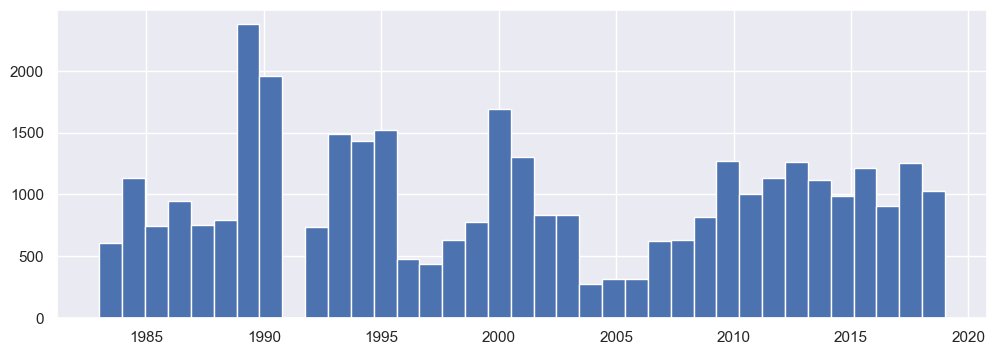

In [6]:
plt.figure(figsize=(12, 4))
n_years = df['YEAR'].max() - df['YEAR'].min() + 1
df['YEAR'].hist(bins=n_years)
plt.show()

In [7]:
column_names = df.columns
column_names

Index(['YEAR', 'MM', 'DD', 'WEEK', 'SITE', 'PERIOD', 'CONDITION', 'FISH_NO',
       'FL_WET', 'FL_FROZEN', 'FL_STD', 'WEIGHT', 'SPECIES', 'SEX', 'MATURITY',
       'GONAD_WEIGHT', '1st Person Aging', 'AGE', 'FSP', 'Comments',
       '2nd Person Aging', 'AGE.1', 'FSP.1', 'Comments.1', 'Envelop Comments',
       'AGE_notes', 'FSP_notes'],
      dtype='object')

In [60]:
df['WEEK'].nunique()

9

--------------------------------------------------
Histogram: Year


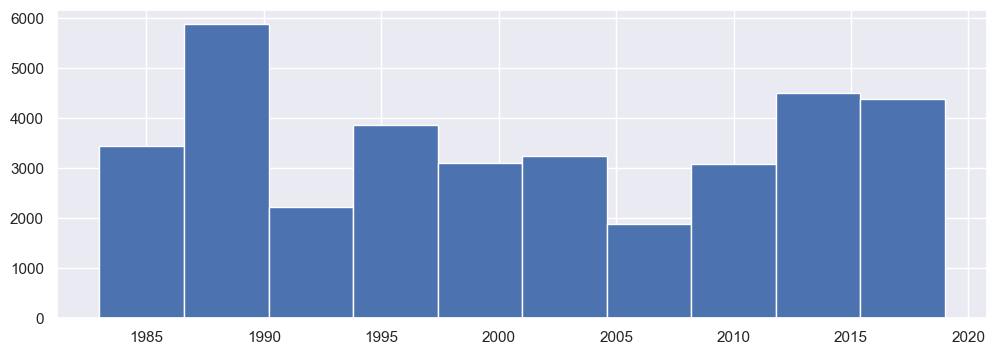

--------------------------------------------------
Histogram: Mm


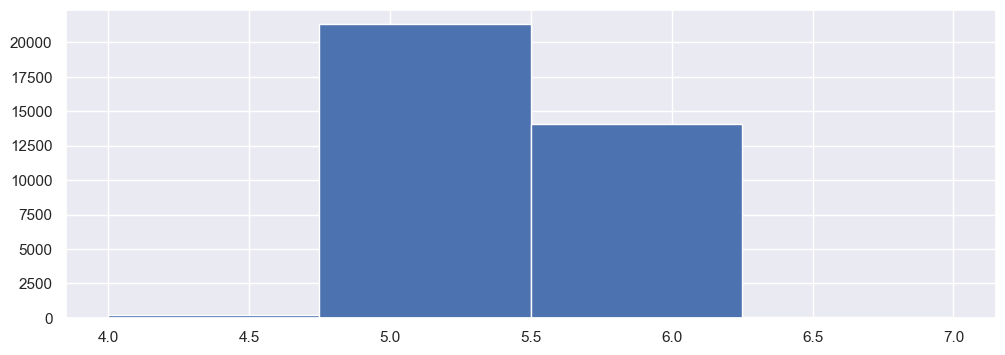

--------------------------------------------------
Histogram: Dd


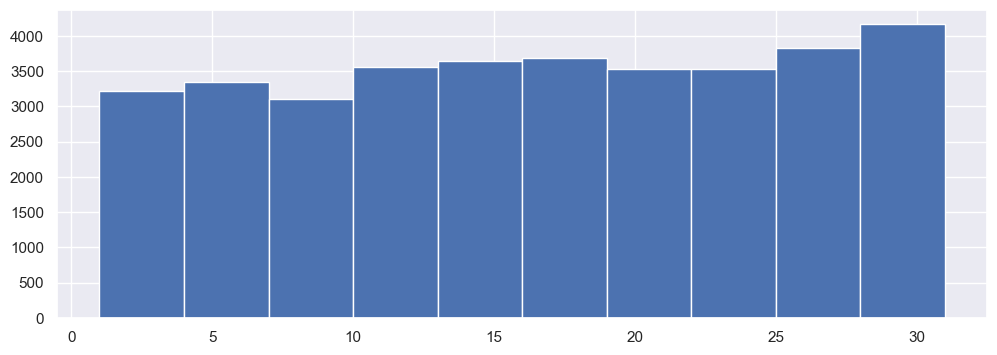

--------------------------------------------------
Histogram: Week


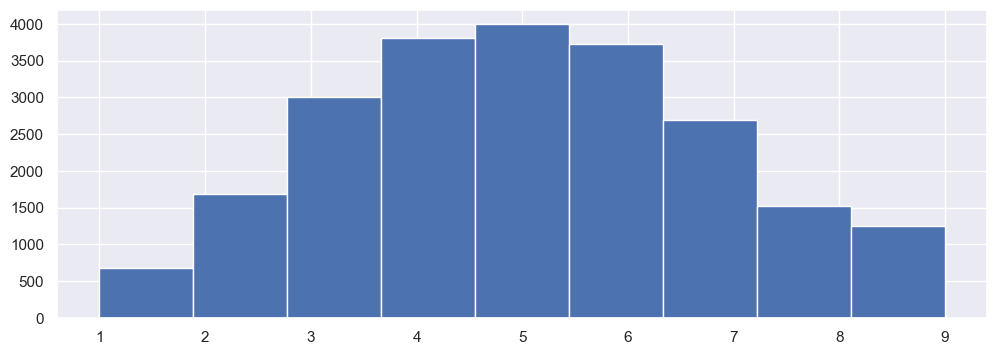

--------------------------------------------------
Histogram: Period


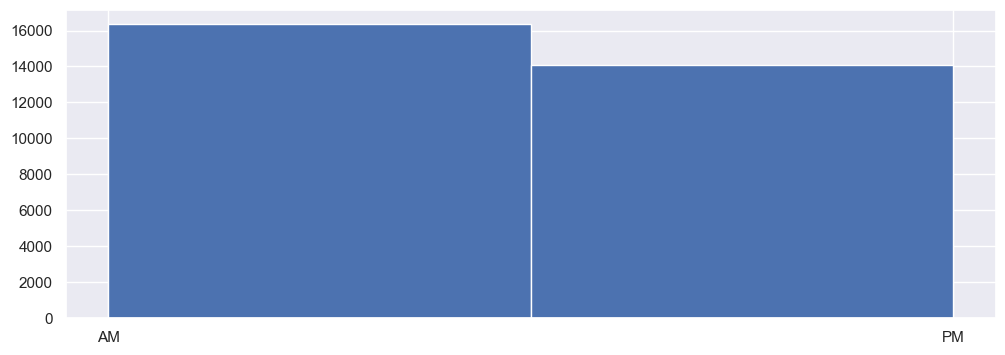

--------------------------------------------------
Histogram: Condition


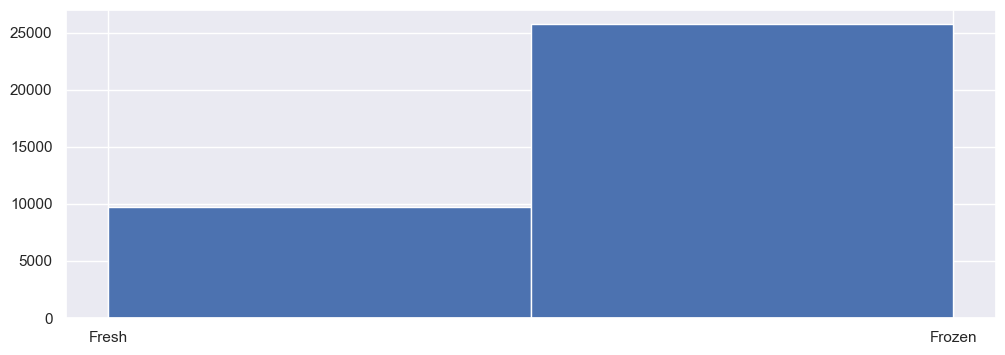

--------------------------------------------------
Histogram: Fish_No


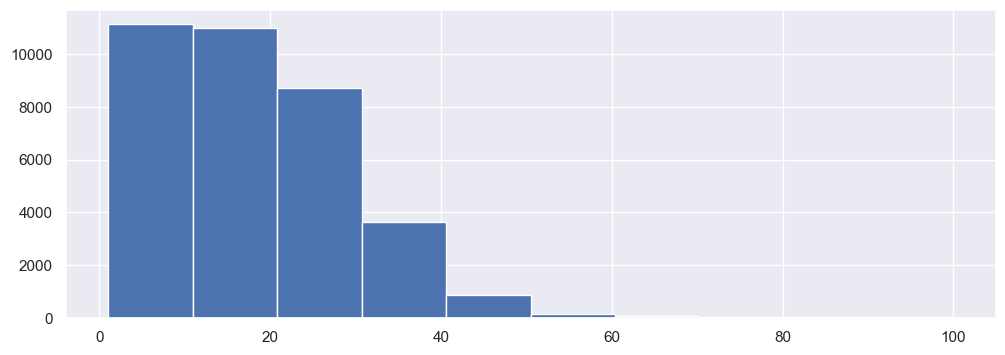

--------------------------------------------------
Histogram: Fl_Wet


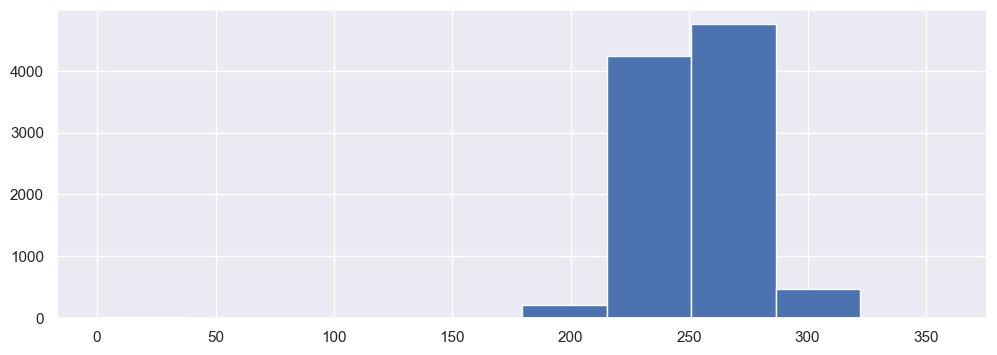

--------------------------------------------------
Histogram: Fl_Frozen


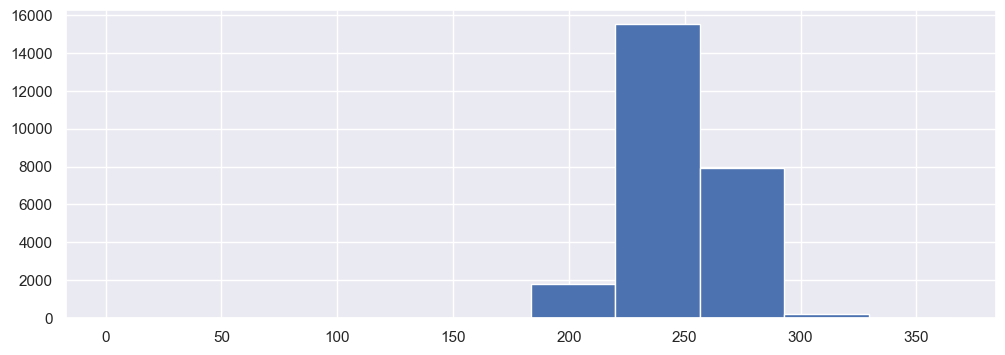

--------------------------------------------------
Histogram: Fl_Std


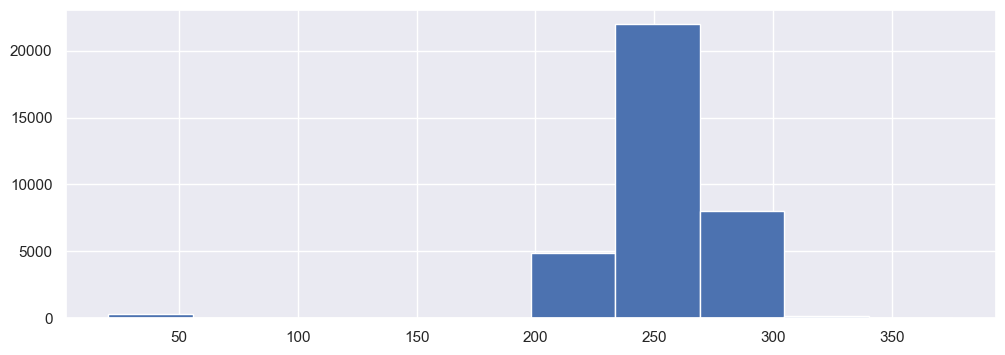

--------------------------------------------------
Histogram: Weight


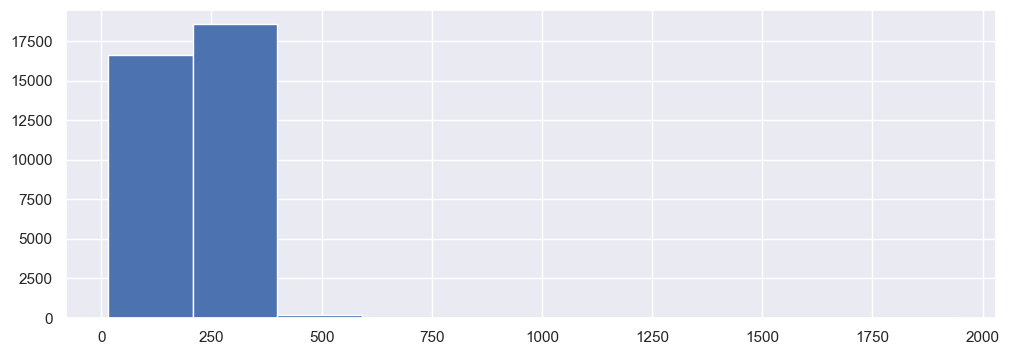

--------------------------------------------------
Histogram: Species


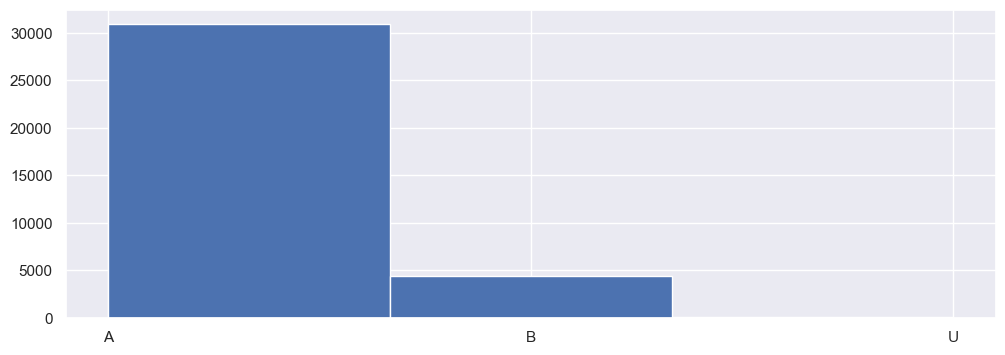

--------------------------------------------------
Histogram: Sex


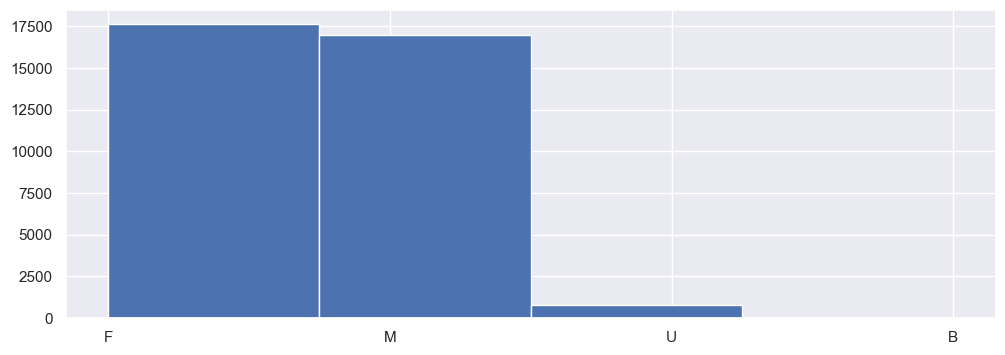

--------------------------------------------------
Histogram: Maturity


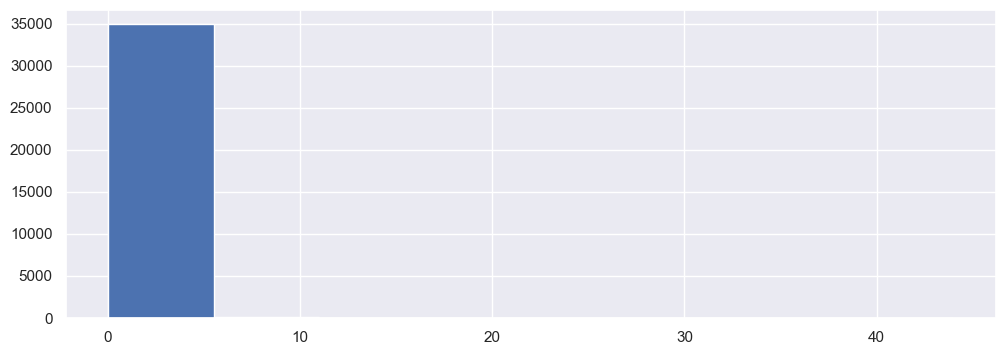

--------------------------------------------------
Histogram: Gonad_Weight


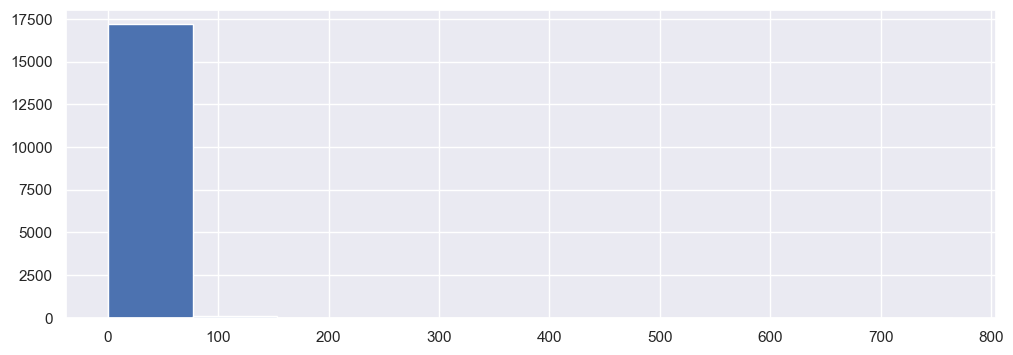

--------------------------------------------------
Histogram: 1St Person Aging


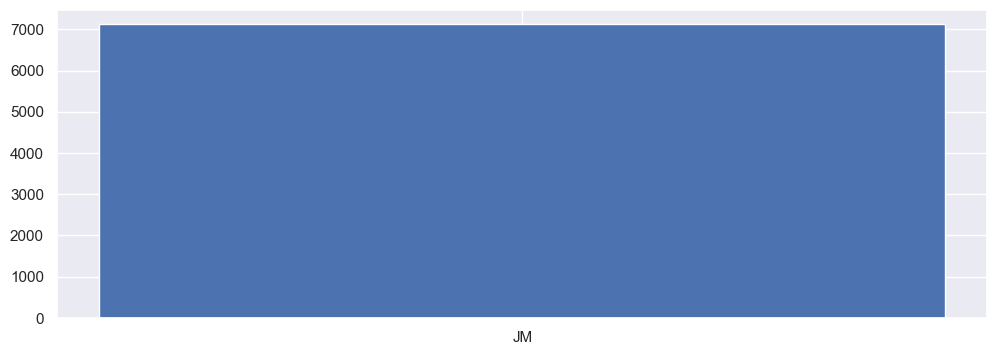

--------------------------------------------------
Histogram: Age


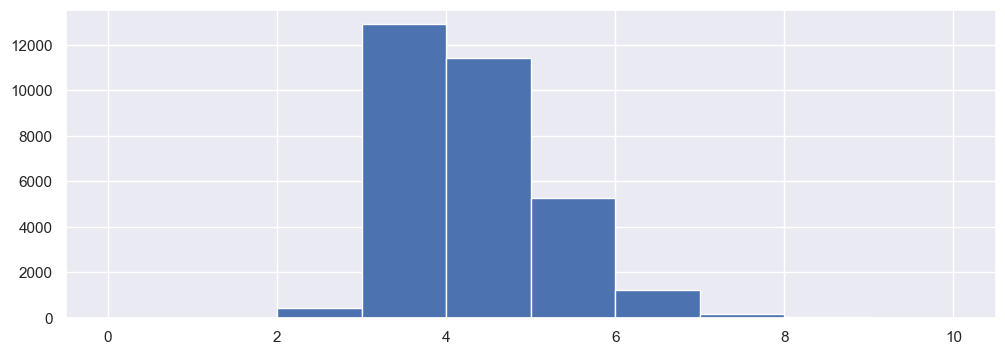

--------------------------------------------------
Histogram: Fsp


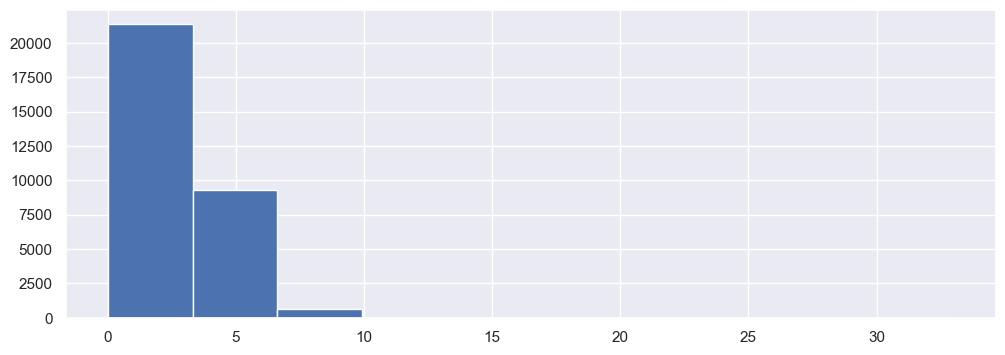

--------------------------------------------------
Histogram: 2Nd Person Aging


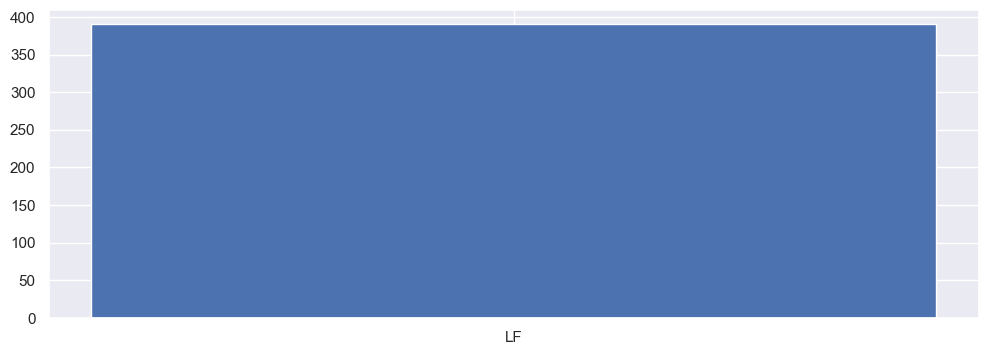

--------------------------------------------------
Histogram: Age.1


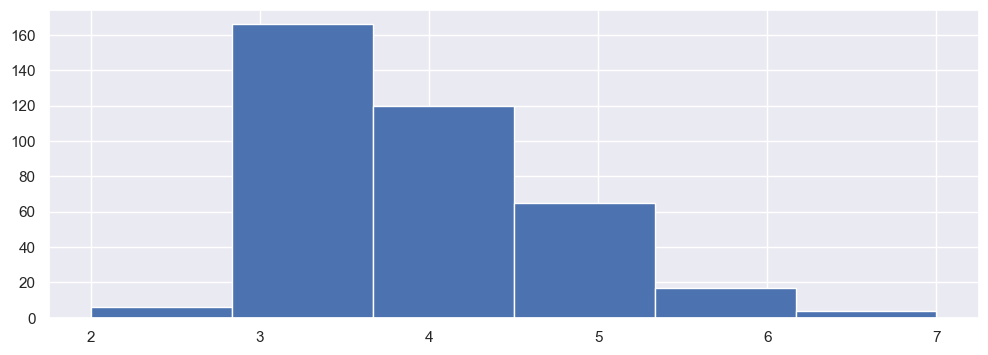

--------------------------------------------------
Histogram: Fsp.1


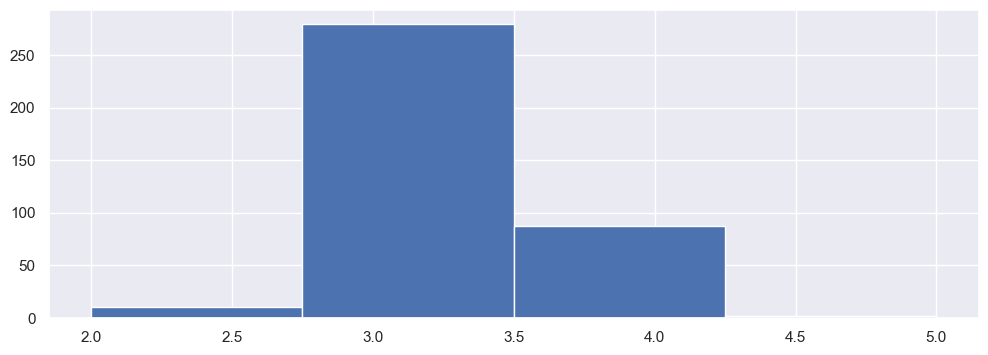

In [62]:
columns_to_print = ['YEAR', 'MM', 'DD', 'WEEK', 'PERIOD', 'CONDITION', 'FISH_NO',
       'FL_WET', 'FL_FROZEN', 'FL_STD', 'WEIGHT', 'SPECIES', 'SEX', 'MATURITY',
       'GONAD_WEIGHT', '1st Person Aging', 'AGE', 'FSP', '2nd Person Aging', 'AGE.1', 'FSP.1']

for column in columns_to_print:
    print('--------------------------------------------------\nHistogram:', column.title())
    
    plt.figure(figsize=(12, 4))
    
    n_unique = df[column].nunique()
    if n_unique <= 10:
        df[column].hist(bins=n_unique)
    else:
        df[column].hist()
    
    plt.show()

# Correlation

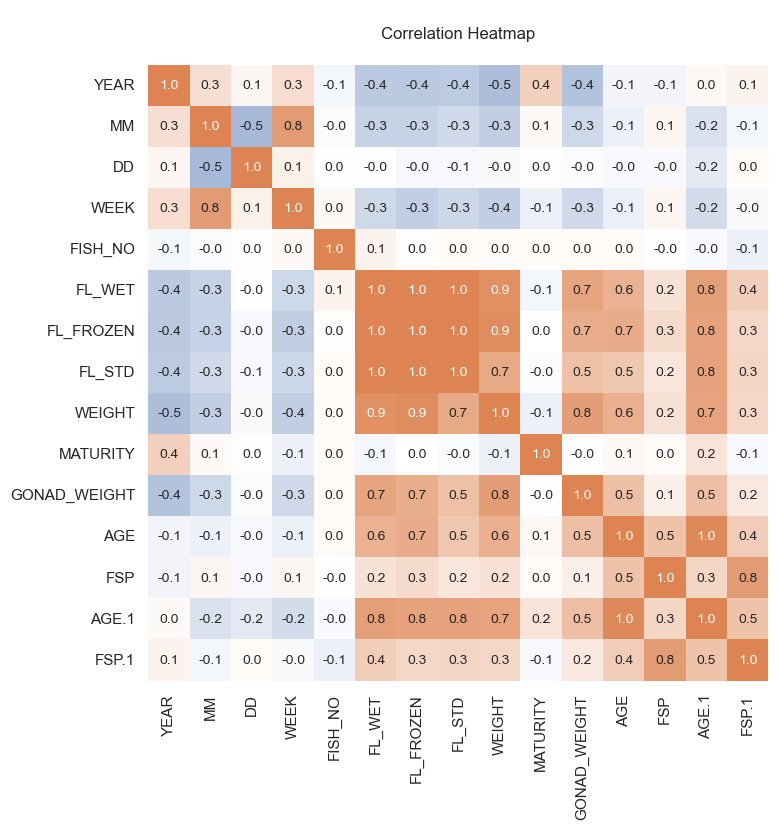

In [32]:
plt.figure(figsize=(8,8))
palette = sns.blend_palette([sns.color_palette()[0], '#ffffff', sns.color_palette()[1]], 3, as_cmap=True)
sns.heatmap(df.corr(), cmap=palette, annot=True, center=0, vmin=-1, vmax=1, fmt='.1f', annot_kws={"size": 10}, cbar=False)
plt.title('\nCorrelation Heatmap\n')
plt.show()

# Time Series

In [41]:
df['DATETIME'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MM'].astype(str) + '-' + df['DD'].astype(str))


-------------------------------------------------------
 Fl_Wet


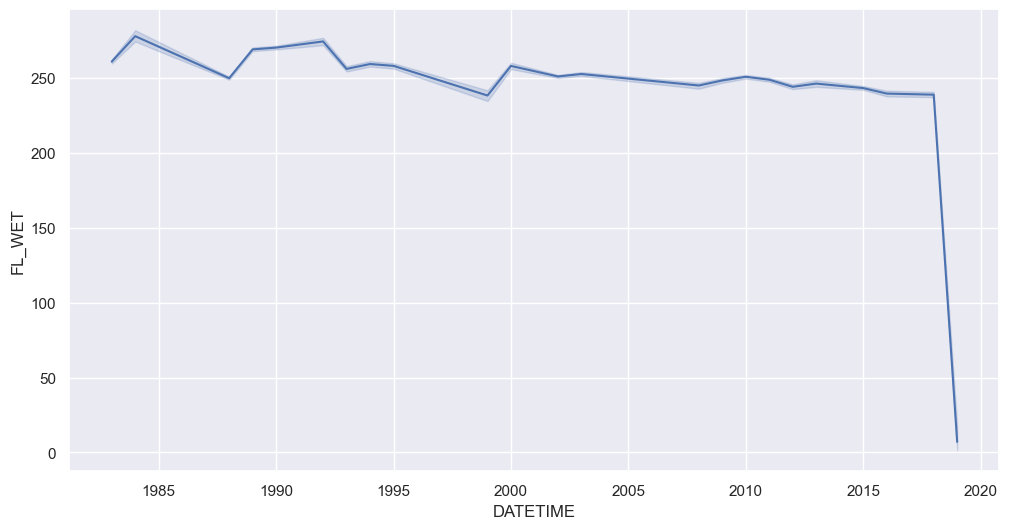


-------------------------------------------------------
 Fl_Frozen


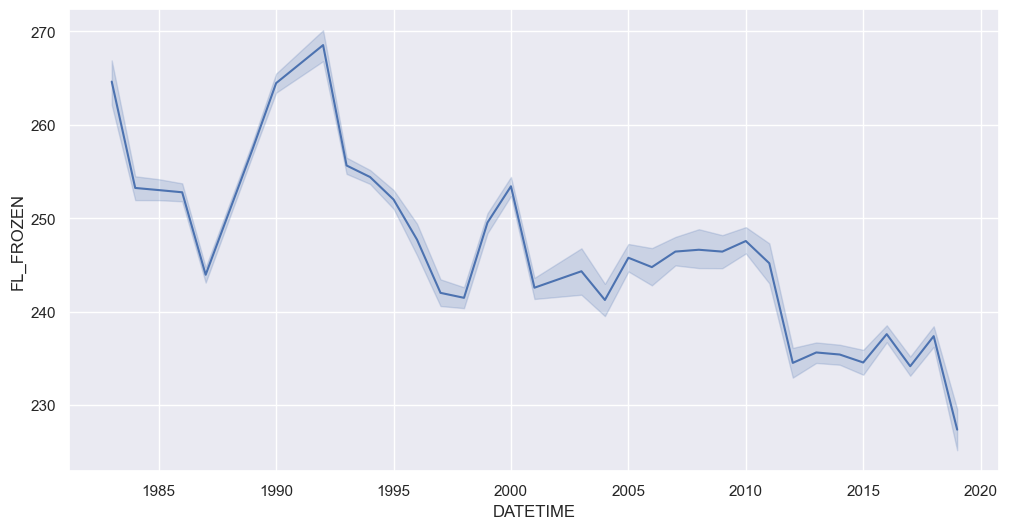


-------------------------------------------------------
 Fl_Std


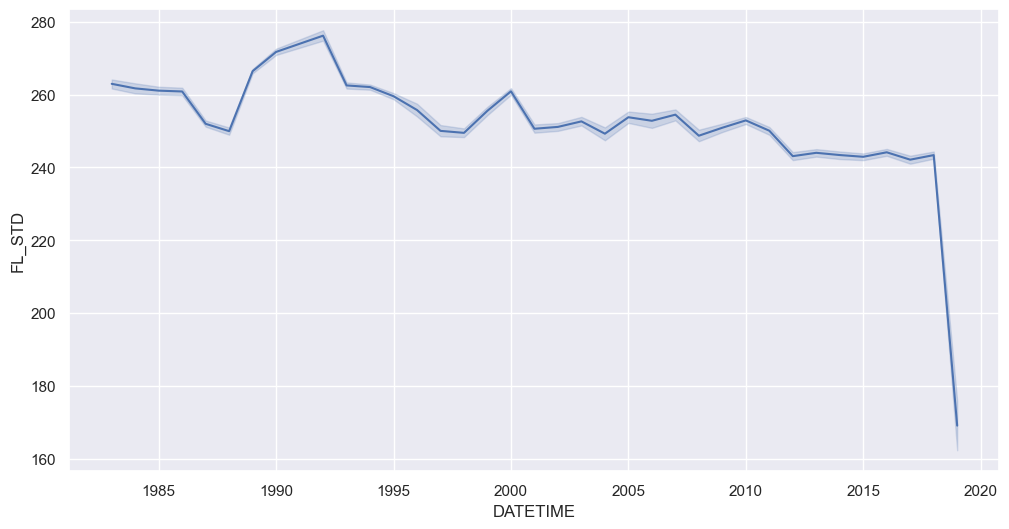


-------------------------------------------------------
 Weight


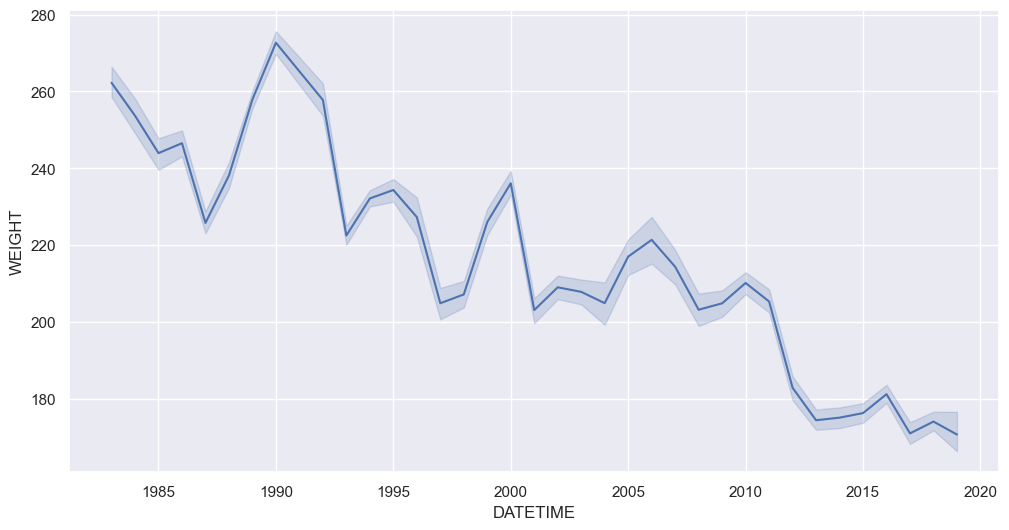


-------------------------------------------------------
 Species


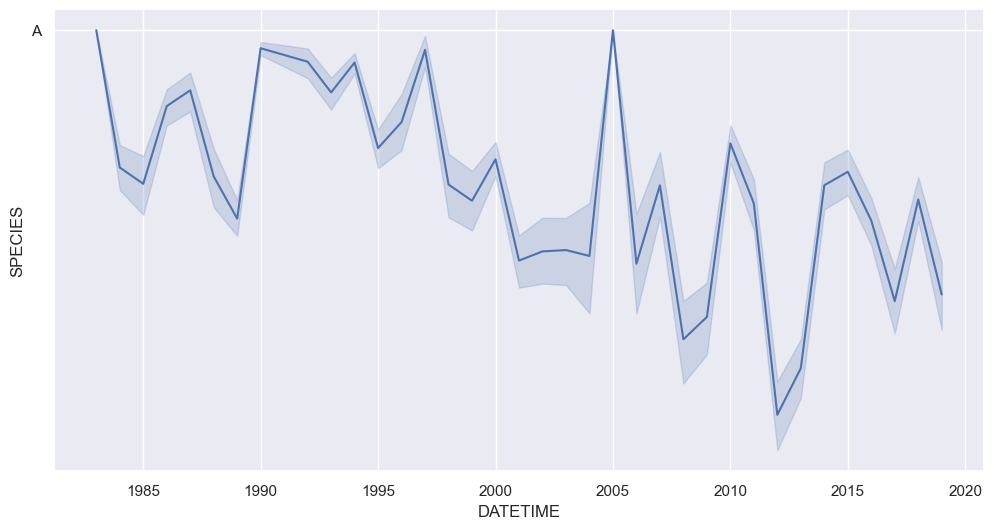


-------------------------------------------------------
 Sex


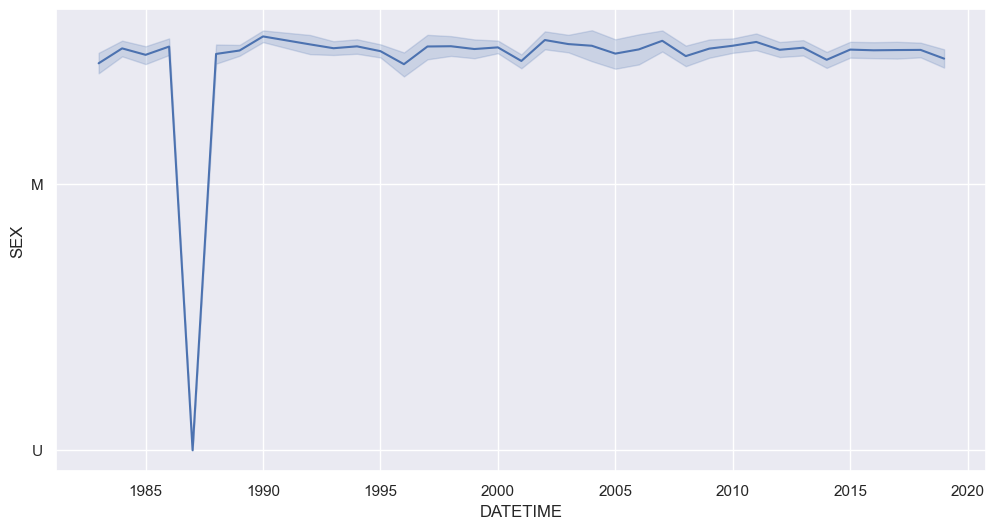


-------------------------------------------------------
 Maturity


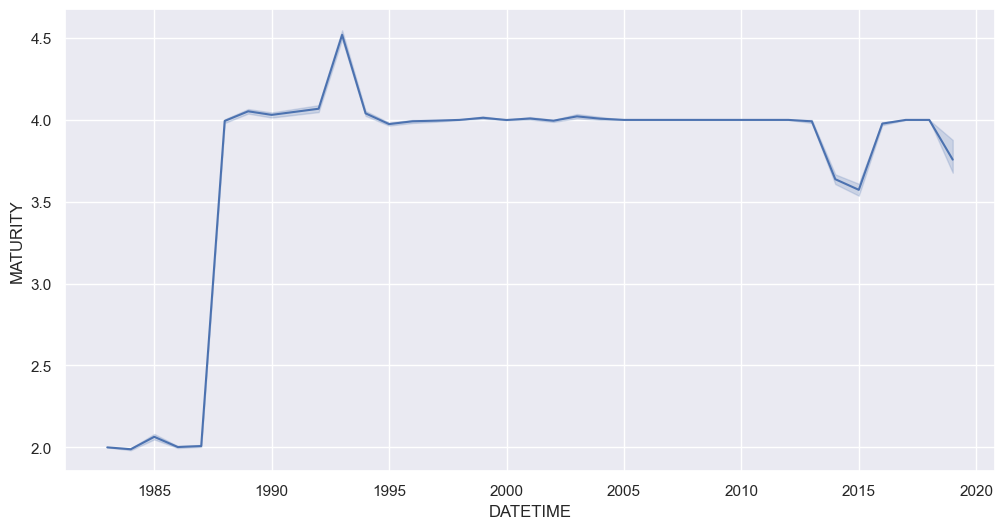


-------------------------------------------------------
 Gonad_Weight


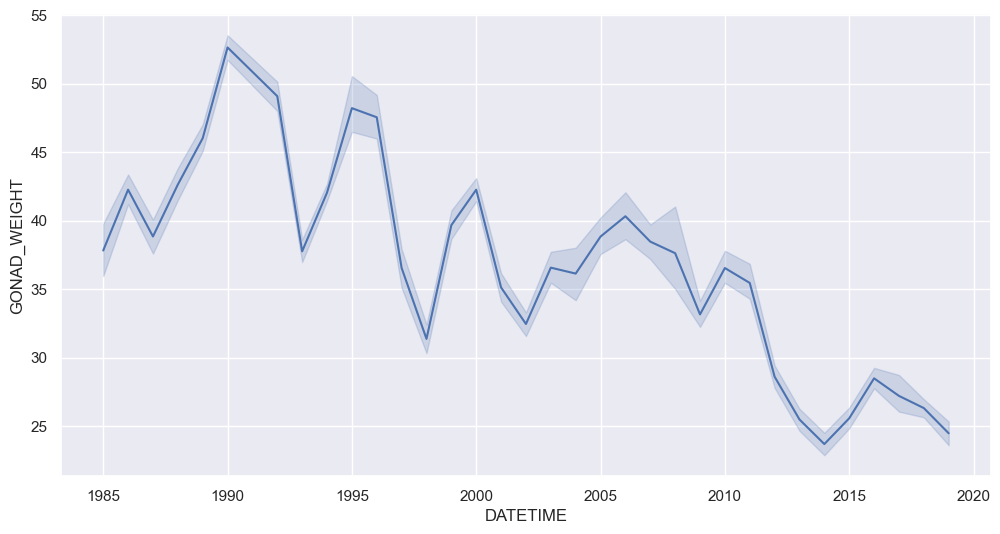


-------------------------------------------------------
 Age


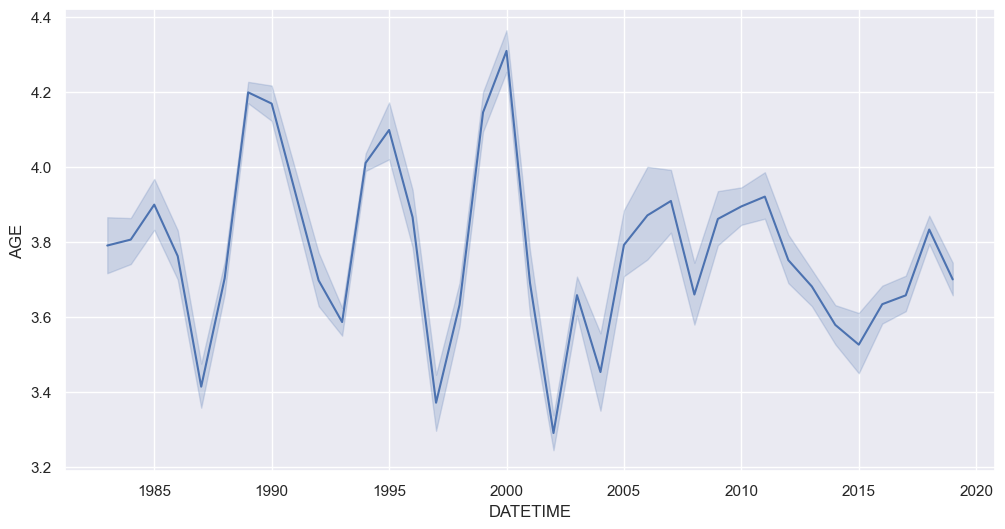


-------------------------------------------------------
 Fsp


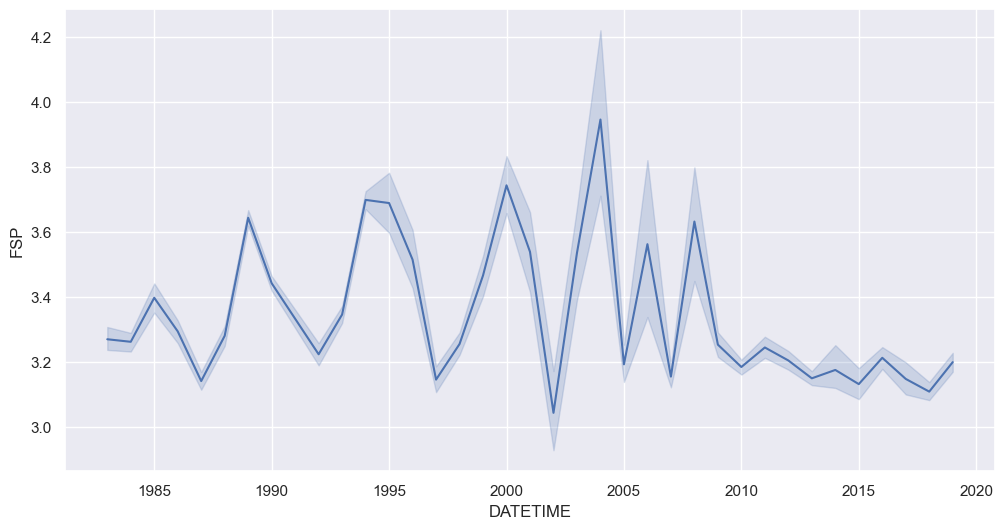


-------------------------------------------------------
 Age.1


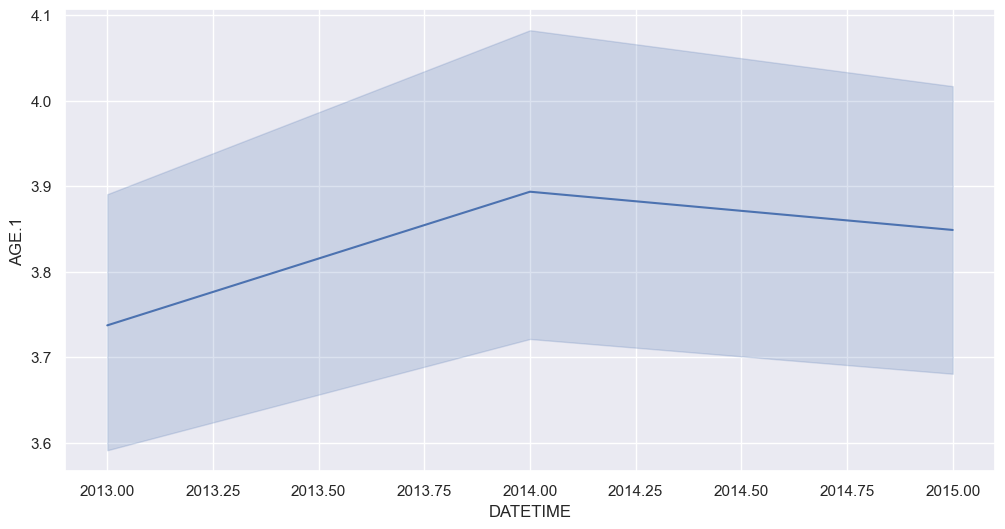


-------------------------------------------------------
 Fsp.1


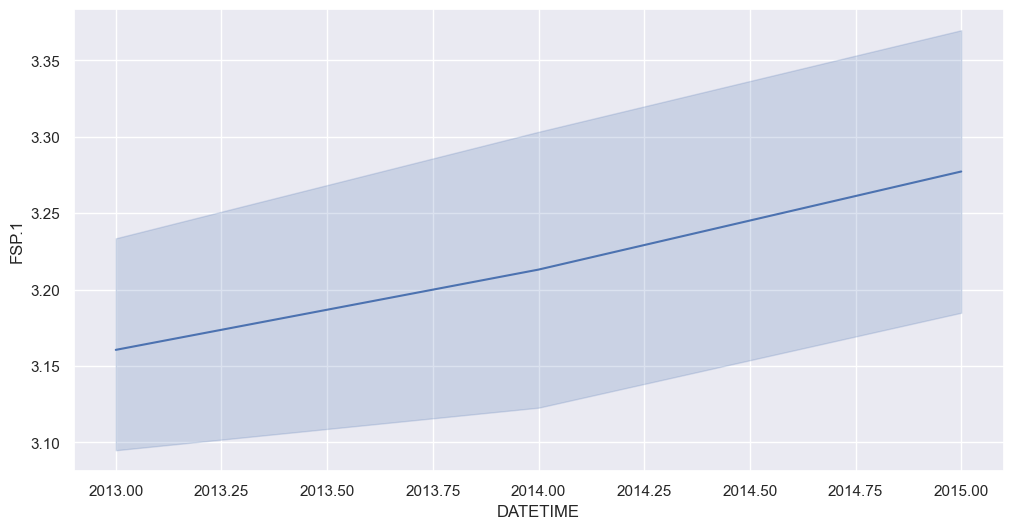

In [56]:
features = [
    'FL_WET', 'FL_FROZEN', 'FL_STD', 'WEIGHT', 'SPECIES', 'SEX', 'MATURITY', 
    'GONAD_WEIGHT', 'AGE', 'FSP', 'AGE.1', 'FSP.1'
]

for feature in features:
    
    print('\n-------------------------------------------------------\n', feature.title())
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df.DATETIME.dt.year, y=df[feature])
    plt.show()